In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

## Grid Search

In [6]:
metrics = ["euclidean", "cosine"] #"brute" and "auto" were presenting the exact same results.
#leaf_size = [10, 20, 30, 40, 50] #all leaf sizes were prducing the same results
eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples = [100, 200, 300, 400, 500]

In [7]:
def grid_search(logs, labels_, gram, min_df):
     
    X = get_features(logs, gram, min_df)
    X = X.toarray()
    
    idxs = np.where(np.all(X == 0, axis=1))
    
    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
    
    result_header = ["Metrics", "Eps", "Min Samples", "VMeasure", "Fowlkes-Mallows", "Clusters (No)"]
    results = []
    
    labels = []
    ls = 0
    
    for metric in metrics:
        for ep in eps:
            for min_s in min_samples:
                model = DBSCAN(eps=ep,min_samples=min_s,algorithm="auto",metric=metric)
                model.fit(X)

                labels = model.labels_

            #plt.figure()
            #plt.suptitle("DBSCAN(gram=%d,eps=%d,min_samples=%d,leaf_size=%d,algorithm=%s)" % (gram,ep,min_s,ls,alg), size=14)

                vm = evaluate_vmeasure(labels_, labels)
                fm = evaluate_fm(labels_, labels)

                lst1 = set(labels)

                result = [metric, ep, min_s, vm, fm, len(lst1)-1]
                results.append(result)
                tab_results(result_header, results) 

                
    tab_results(result_header, results)         
            

In [8]:
grid_search(logs, log_labels, 2, 70)

+-----------+-----+-------------+--------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.2674601241075727 | 0.40668798073216883 |       31      |
+-----------+-----+-------------+--------------------+---------------------+---------------+
+-----------+-----+-------------+--------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+---------------------+---------------+
| euclidean | 0.1 |     100     | 0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     | 0.2235939154423416 |  0.471556325009407  |       12      |
+-----------+-----+-------------+--------------------+----------------

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2674601241075727 | 0.40668798073216883 |       31      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     |  0.2814536283137844 |  0.3842144644819635 |       34      |
| euclidean | 0.2 |     200     | 0.24611317817675757 | 0.45292298577284923 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

In [9]:
grid_search(logs, log_labels, 2, 100)

+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.2713508727164303 | 0.3843169150638861 |       36      |
+-----------+-----+-------------+--------------------+--------------------+---------------+
+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.2713508727164303 | 0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     | 0.2235939154423416 | 0.471556325009407  |       12      |
+-----------+-----+-------------+--------------------+--------------------+-----

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713508727164303 |  0.3843169150638861 |       36      |
| euclidean | 0.1 |     200     |  0.2235939154423416 |  0.471556325009407  |       12      |
| euclidean | 0.1 |     300     | 0.18495422476732298 |  0.5022754745542745 |       7       |
| euclidean | 0.1 |     400     | 0.15150884514466162 |  0.5392322577144931 |       4       |
| euclidean | 0.1 |     500     | 0.06453361119443532 |  0.5708968942883246 |       1       |
| euclidean | 0.2 |     100     | 0.29510257994650246 |  0.3561675403572133 |       43      |
| euclidean | 0.2 |     200     | 0.24618393814760667 | 0.45290185233062585 |       14      |
| euclidean | 0.2 |     300     |  0.2152498584951346 | 0.49

In [10]:
grid_search(logs, log_labels, 3, 90)

+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.2701173790190415 | 0.3926139436061186 |       34      |
+-----------+-----+-------------+--------------------+--------------------+---------------+
+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
+-----------+-----+-------------+---------------------+---------------

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2701173790190415 |  0.3926139436061186 |       34      |
| euclidean | 0.1 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.1 |     300     |  0.185170816560918  |  0.5019732279443477 |       7       |
| euclidean | 0.1 |     400     |  0.1518283808285953 |  0.5391653299193853 |       4       |
| euclidean | 0.1 |     500     | 0.06454746523318834 |  0.5707469527616478 |       1       |
| euclidean | 0.2 |     100     |  0.2724746774194572 |  0.3911823788024444 |       35      |
| euclidean | 0.2 |     200     | 0.22370436802308388 | 0.47100042702925715 |       12      |
| euclidean | 0.2 |     300     |  0.185170816560918  |  0.5

In [11]:
grid_search(logs, log_labels, 3, 100)

+-----------+-----+-------------+--------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |      VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+--------------------+--------------------+---------------+
| euclidean | 0.1 |     100     | 0.2713751508902113 | 0.3821944646533853 |       36      |
+-----------+-----+-------------+--------------------+--------------------+---------------+
+-----------+-----+-------------+---------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+--------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 | 0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |  0.47005568547582  |       12      |
+-----------+-----+-------------+---------------------+--------------------

+-----------+-----+-------------+---------------------+--------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |  Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+--------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 | 0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |  0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 | 0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 | 0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 | 0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 | 0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |  0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 | 0.501495309170

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

+-----------+-----+-------------+---------------------+---------------------+---------------+
|  Metrics  | Eps | Min Samples |       VMeasure      |   Fowlkes-Mallows   | Clusters (No) |
+-----------+-----+-------------+---------------------+---------------------+---------------+
| euclidean | 0.1 |     100     |  0.2713751508902113 |  0.3821944646533853 |       36      |
| euclidean | 0.1 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.1 |     300     | 0.18552512021047637 |  0.5014953091706899 |       7       |
| euclidean | 0.1 |     400     | 0.15241378192402438 |  0.5391346940742134 |       4       |
| euclidean | 0.1 |     500     | 0.06457140487518484 |  0.5705218500660529 |       1       |
| euclidean | 0.2 |     100     | 0.27359077718864644 |  0.3806099409130071 |       37      |
| euclidean | 0.2 |     200     | 0.22384678100306932 |   0.47005568547582  |       12      |
| euclidean | 0.2 |     300     | 0.18552512021047637 |  0.5

## Bigram Feature Vectorizer

In [12]:
eval_results = []

In [13]:
labels_ = log_labels

X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [14]:
model = DBSCAN(eps=0.4,min_samples=200,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(eps=0.4, metric='cosine', min_samples=200)

In [15]:
labels = model.labels_

In [16]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

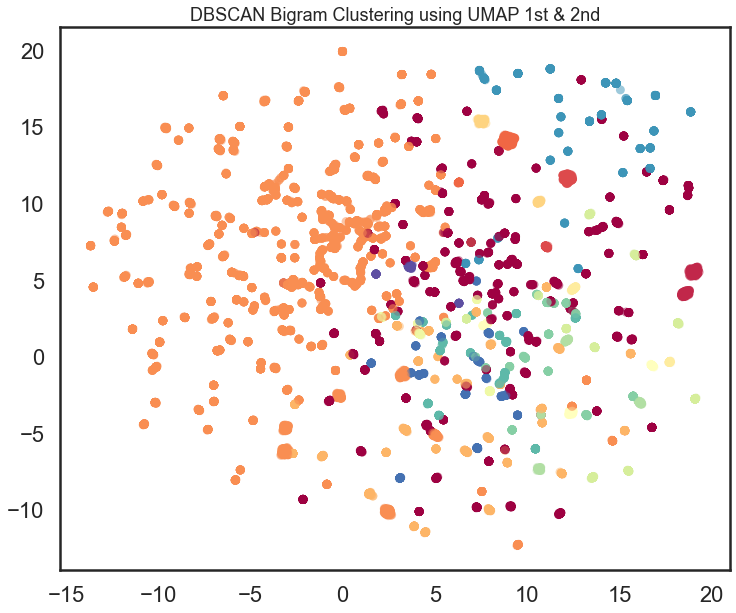

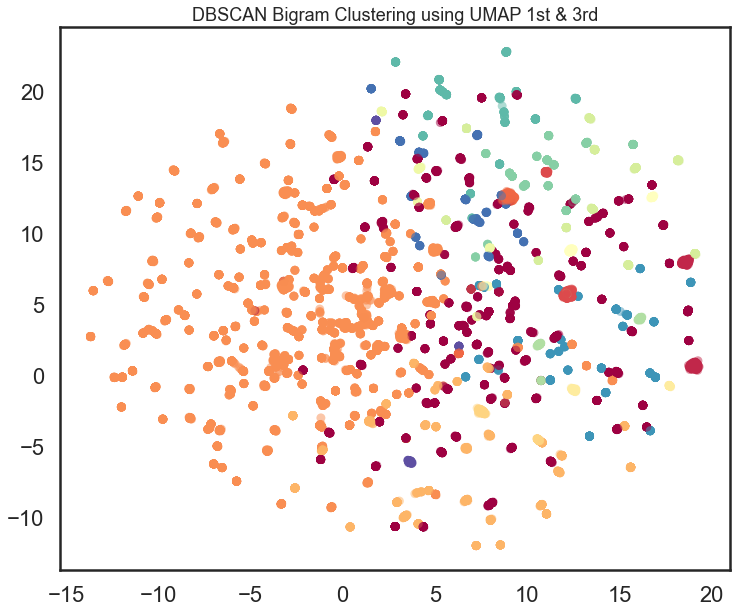

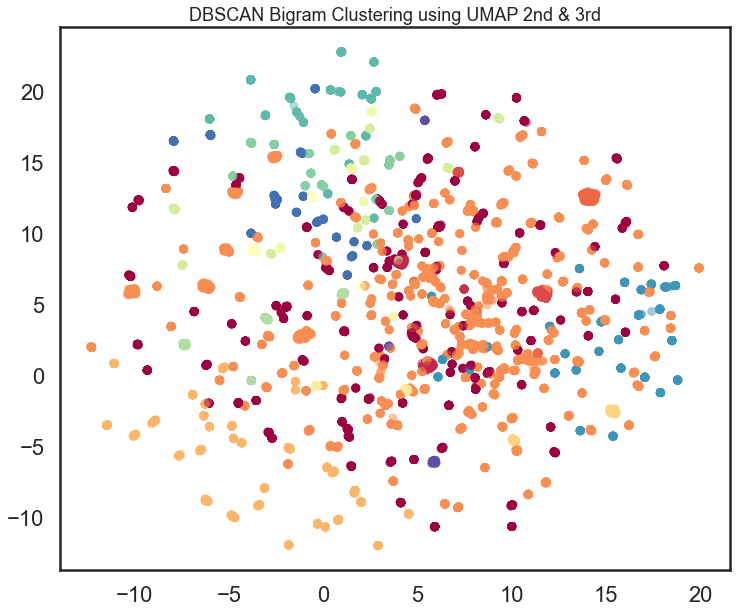

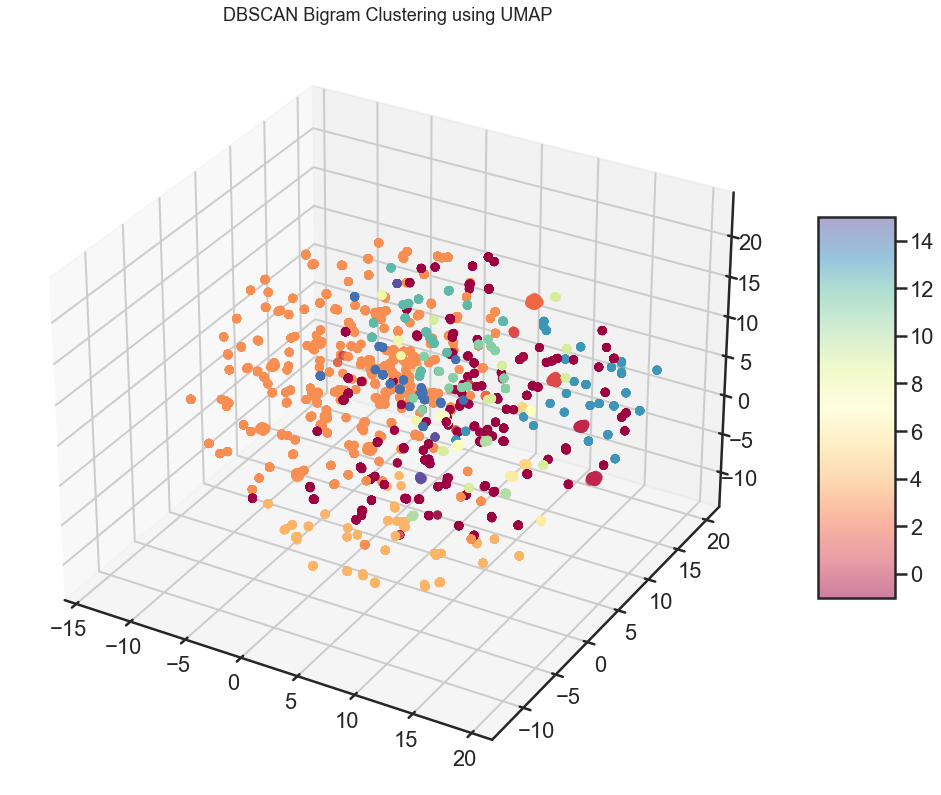

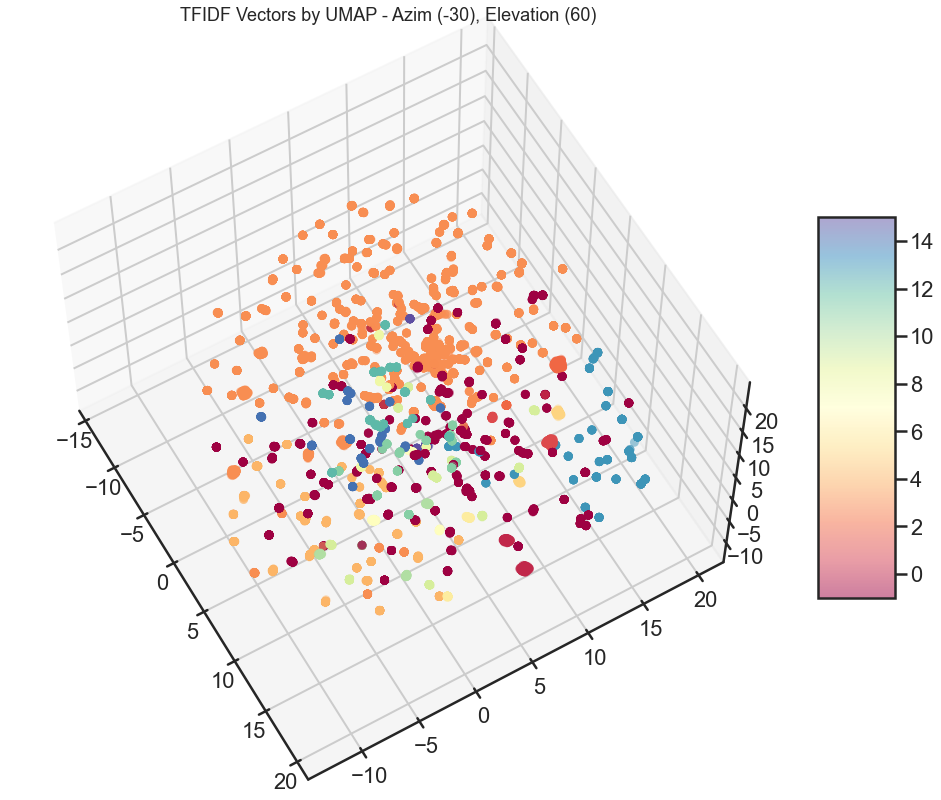

In [17]:
plot_clusters("DBSCAN Bigram Clustering using UMAP", X, labels)

In [18]:
results = evaluate_clustering('DBSCAN Bigram Clustering ', X, labels_, labels)
print(results)

['DBSCAN Bigram Clustering ', '0.54', '0.30', '0.38', '0.20', '0.38', '0.43']


In [19]:
eval_results.append(results)

In [20]:
np.count_nonzero(labels == -1)

3834

## Trigram Feature Vectorizer

In [21]:
labels_ = log_labels

X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [22]:
model = DBSCAN(eps=0.5,min_samples=100,algorithm="auto",metric="cosine")
model.fit(X)

DBSCAN(metric='cosine', min_samples=100)

In [23]:
labels = model.labels_

In [24]:
lst1 = set(labels)
lst1

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

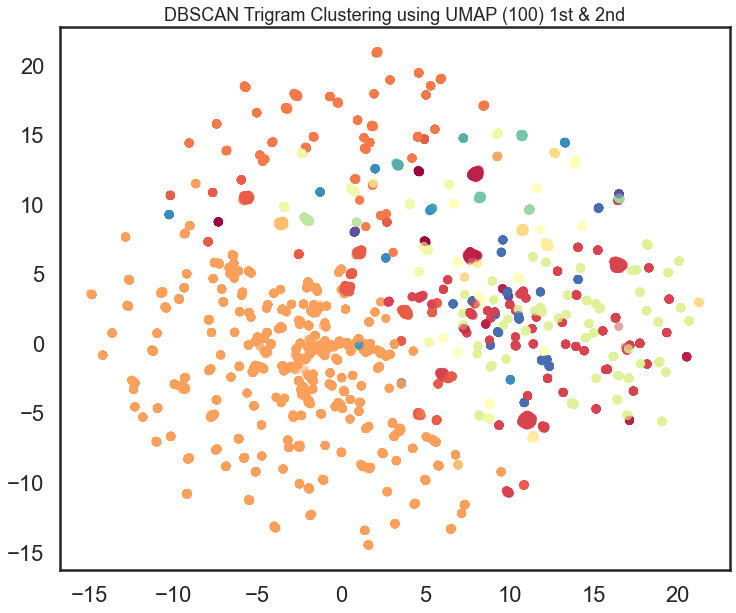

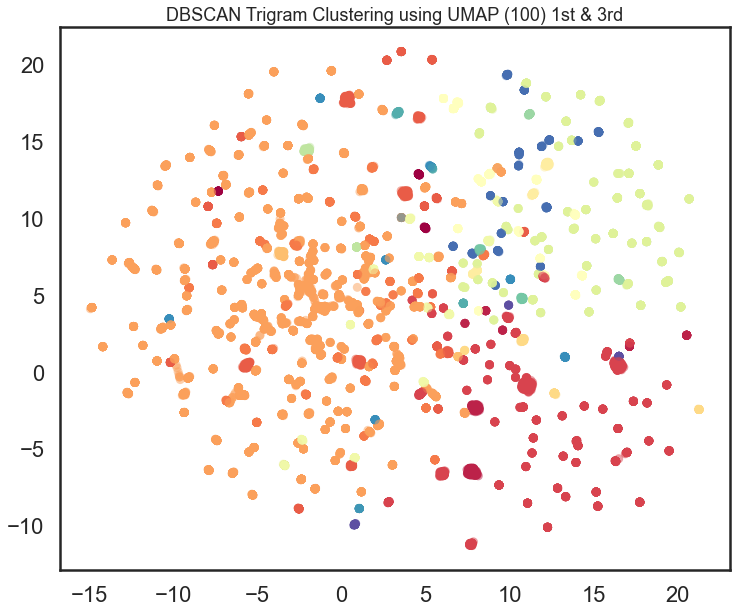

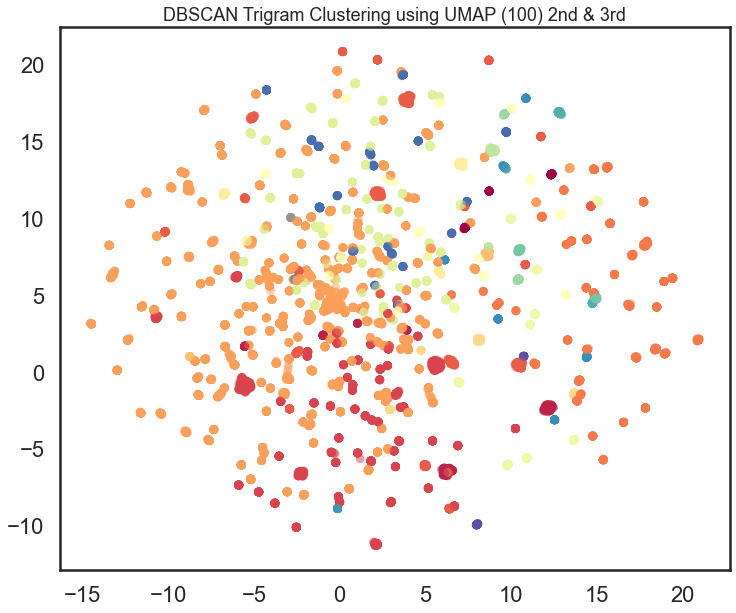

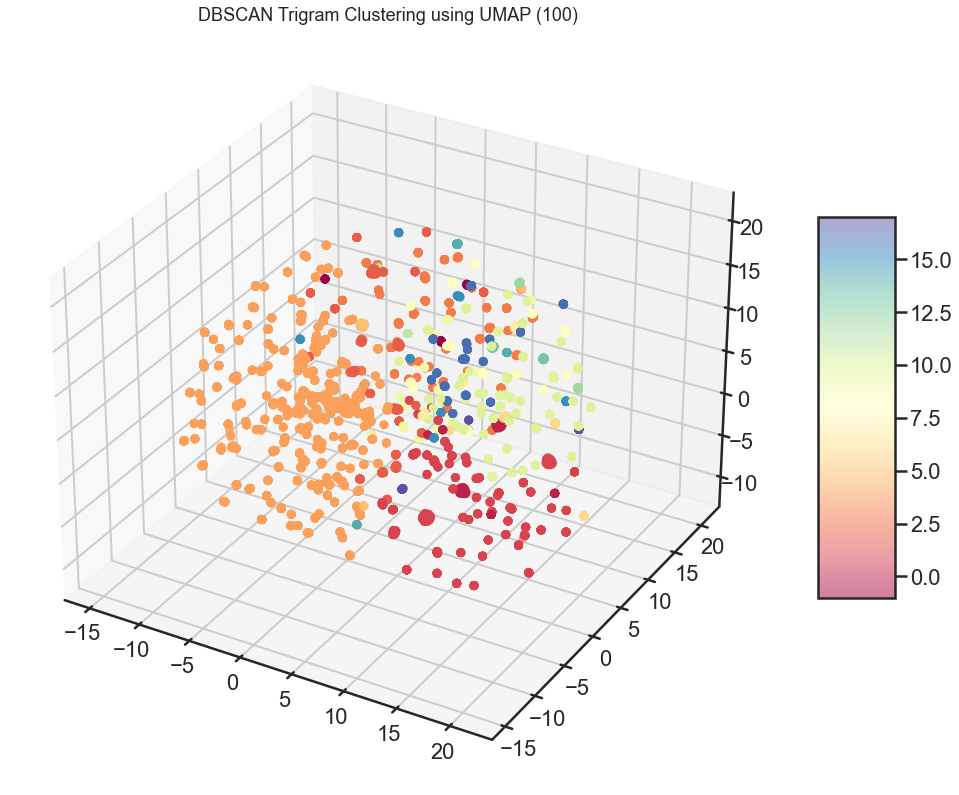

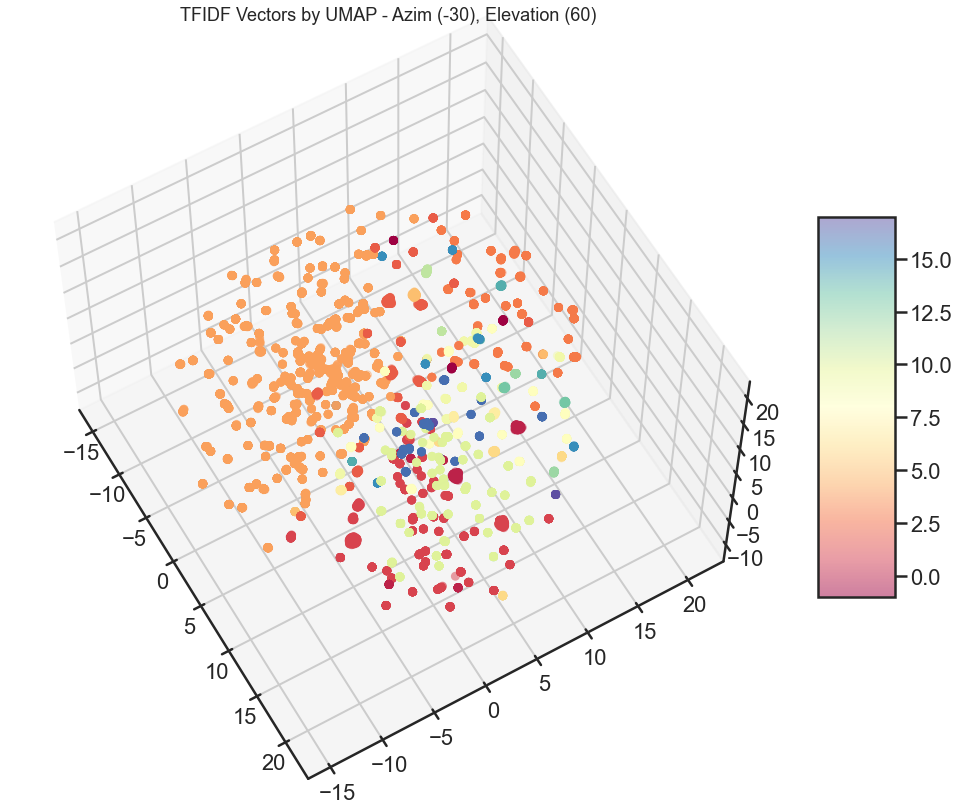

In [25]:
plot_clusters("DBSCAN Trigram Clustering using UMAP (100)", X, labels)

In [26]:
results = evaluate_clustering('DBSCAN Trigram Clustering (100)', X, labels_, labels)
print(results)

['DBSCAN Trigram Clustering (100)', '0.78', '0.38', '0.51', '0.28', '0.51', '0.47']


In [27]:
eval_results.append(results)

In [28]:
tabulate_results(eval_results)

+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|               Name              | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|    DBSCAN Bigram Clustering     |     0.54    |     0.30     |    0.38   |      0.20      |        0.38       |       0.43      |
| DBSCAN Trigram Clustering (100) |     0.78    |     0.38     |    0.51   |      0.28      |        0.51       |       0.47      |
+---------------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
